In [1]:
import polars as pl
import numpy as np
import re

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

# Merge

In [2]:
rs = pl.read_parquet("data/cephalosporines_clean/reports_short.parquet")
rs

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,datetime[ns],str,str,f64,f64
164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
173,1973-06-18 00:00:00,"""Male""","""42""",82.0,180.0
180,1973-06-18 00:00:00,"""Female""","""29""",null,null
346,1973-07-16 00:00:00,"""Female""","""""",null,null
356,1973-07-16 00:00:00,"""Female""","""21""",60.0,null
…,…,…,…,…,…
908140706,2025-06-25 00:00:00,"""Male""","""19""",null,null
908142798,2025-06-25 00:00:00,"""Male""","""59""",null,null
908147666,2025-06-27 00:00:00,"""Female""","""19""",null,null


In [3]:
rd = pl.read_parquet("data/cephalosporines_clean/report_drug.parquet")
rd

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,DRUGINVOLV_FR,ROUTEADMIN_ENG,ROUTEADMIN_FR,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSE_UNIT_FR,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQUENCY_TIME_FR,FREQ_TIME_UNIT_ENG,FREQ_TIME_UNIT_FR,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,THERAPY_DURATION_UNIT_FR,DOSAGEFORM_ENG,DOSAGEFORM_FR
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…"
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE"""
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Concomitant""","""Intravenous (not otherwise spe…","""Intraveineuse (sans autre préc…","""40""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR""","""LIQUIDE POUR ADMINISTRATION IN…"
4419406,164,1625,"""APRESOLINE INJECTION 20MG/AMPO…","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""20""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""POWDER FOR SOLUTION INTRAVENOU…","""POUDRE POUR SOLUTION INTRAVEIN…"
4419404,164,24440,"""KEFLIN""","""Suspect""","""Suspect""","""""","""""","""1""","""Gram""","""Gramme""","""4""","""1""","""Days""","""Jour(s)""","""4 every 1 Days""","""4 chaque 1 Jour(s)""","""""","""""","""""","""POWDER FOR SOLUTION INTRAMUSCU…","""POUDRE POUR SOLUTION INTRAMUSC…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949073,908149644,58275,"""CEPHALEXIN""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""250""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
4949077,908149644,31567,"""MYRBETRIQ""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""50""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""TABLET (EXTENDED-RELEASE)""","""COMPRIMÉ (LIBÉRATION PROLONGÉE…"
4949078,908149644,33553,"""ACETYLSALICYLIC ACID""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""81""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE"""


In [4]:
rdi = pl.read_parquet("data/cephalosporines_clean/drug_product_ingredients.parquet")
rdi

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
29599010225,29599,"""BENZYDAMINE HYDROCHLORIDE/DICH…",10225,"""lidocaine hydrochloride"""
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
54995010225,54995,"""BECLOMETHASONE DIPROPIONATE/LI…",10225,"""lidocaine hydrochloride"""
55044010225,55044,"""ALUMINUM HYDROXIDE/DIPHENHYDRA…",10225,"""lidocaine hydrochloride"""
58165010225,58165,"""LIDOCAINE HYDROCHLORIDE/NOREPI…",10225,"""lidocaine hydrochloride"""
…,…,…,…,…
3322005010254,33220,"""DIPHTHERIA TOXOID (+) PERTUSSI…",5010254,"""diphtheria toxoid (crm197)"""
3334505010254,33345,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""
3322705008968,33227,"""REACTINE UNSPECIFIED""",5008968,"""cetirizine hcl"""


In [5]:
rdfull = rd.join(rdi, on="DRUG_PRODUCT_ID", how="left")
rdfull

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,DRUGINVOLV_FR,ROUTEADMIN_ENG,ROUTEADMIN_FR,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSE_UNIT_FR,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQUENCY_TIME_FR,FREQ_TIME_UNIT_ENG,FREQ_TIME_UNIT_FR,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,THERAPY_DURATION_UNIT_FR,DOSAGEFORM_ENG,DOSAGEFORM_FR,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…",350308017,"""LARGACTIL 50""",8017,"""chlorpromazine"""
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…",350305009981,"""LARGACTIL 50""",5009981,"""chlorpramazine"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",32842010260,"""LIBRIUM""",10260,"""chlordiazepoxide hydrochloride"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",3284205000697,"""LIBRIUM""",5000697,"""chlordiazepoxide hydrochloride"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",32842010261,"""LIBRIUM""",10261,"""methaminodiazepoxide hcl"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",33586010066,"""TYLENOL""",10066,"""acetyl-p-aminophenol"""
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",3358605008605,"""TYLENOL""",5008605,"""acetaminophen (paracetamol)"""
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",33586010067,"""TYLENOL""",10067,"""paracetamol"""


In [6]:
rs

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,datetime[ns],str,str,f64,f64
164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
173,1973-06-18 00:00:00,"""Male""","""42""",82.0,180.0
180,1973-06-18 00:00:00,"""Female""","""29""",null,null
346,1973-07-16 00:00:00,"""Female""","""""",null,null
356,1973-07-16 00:00:00,"""Female""","""21""",60.0,null
…,…,…,…,…,…
908140706,2025-06-25 00:00:00,"""Male""","""19""",null,null
908142798,2025-06-25 00:00:00,"""Male""","""59""",null,null
908147666,2025-06-27 00:00:00,"""Female""","""19""",null,null


In [22]:
reports_plus = rdfull.select(['REPORT_ID','ACTIVE_INGREDIENT_NAME']).join(rs, on ='REPORT_ID',how = 'right')

In [23]:
reports_plus

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
str,i64,datetime[ns],str,str,f64,f64
"""chlorpromazine""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlorpramazine""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlordiazepoxide hydrochloride""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlordiazepoxide hydrochloride""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""methaminodiazepoxide hcl""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
…,…,…,…,…,…,…
"""acetyl-p-aminophenol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null
"""acetaminophen (paracetamol)""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null
"""paracetamol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null


In [26]:
reports_plus = reports_plus.with_columns(
    pl.col("DATRECEIVED").dt.year().alias("YEAR")
)

reports_filtered = reports_plus.filter(
    (pl.col("YEAR") >= 2021) & (pl.col("YEAR") <= 2025)
)
reports_filtered

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM,YEAR
str,i64,datetime[ns],str,str,f64,f64,i32
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""acetaminophen""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
…,…,…,…,…,…,…,…
"""acetyl-p-aminophenol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025
"""acetaminophen (paracetamol)""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025
"""paracetamol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025


In [11]:
# keep REPORT_ID ACTIVE_INGREDIENT_NAME
rdmini = rdfull.select(["REPORT_ID", "ACTIVE_INGREDIENT_NAME"])
rdmini

REPORT_ID,ACTIVE_INGREDIENT_NAME
i64,str
164,"""chlorpromazine"""
164,"""chlorpramazine"""
164,"""chlordiazepoxide hydrochloride"""
164,"""chlordiazepoxide hydrochloride"""
164,"""methaminodiazepoxide hcl"""
…,…
908149644,"""acetyl-p-aminophenol"""
908149644,"""acetaminophen (paracetamol)"""
908149644,"""paracetamol"""


In [7]:
rs = None
rd = None
rdi = None

In [18]:
CEPH_GEN = {
    "cefaclor": "2/3 gen",
    "cefaclor monohydrate": "2/3 gen",
    "cefadroxil": "1st gen",
    "cefadroxil monohydrate": "1st gen",
    "cefalexin": "1st gen",
    "cefalexin sodium": "1st gen",
    "cefatrizine": "2/3 gen",
    "cefazolin": "1st gen",
    "cefazolin benzathine": "1st gen",
    "cefazolin sodium": "1st gen",
    "cefazolin, sodium": "1st gen",
    "cefazoline benzathine": "1st gen",
    "cefcapene": "2/3 gen",
    "cefcapene pivoxil": "2/3 gen",
    "cefcapene pivoxil hcl": "2/3 gen",
    "cefcapene pivoxil hydrochloride": "2/3 gen",
    "cefcapene pivoxil hydrochloride hydrate": "2/3 gen",
    "cefdinir": "2/3 gen",
    "cefepim": "4/5 gen",
    "cefepime": "4/5 gen",
    "cefepime dihydrochloride monohydrate": "4/5 gen",
    "cefepime hcl": "4/5 gen",
    "cefepime hydrochloride": "4/5 gen",
    "cefepime hydrochloride monohydrate": "4/5 gen",
    "cefepime, hydrochloride, monohydrate": "4/5 gen",
    "cefixima": "2/3 gen",
    "cefixime": "2/3 gen",
    "cefixime trihydrate": "2/3 gen",
    "cefmetazole sodium": "2/3 gen",
    "cefodizime": "2/3 gen",
    "cefodizime disodium": "2/3 gen",
    "cefodizime sodium": "2/3 gen",
    "cefoperazone sodium": "2/3 gen",
    "cefotaxime": "2/3 gen",
    "cefotaxime sodique": "2/3 gen",
    "cefotaxime sodium": "2/3 gen",
    "cefotiam": "2/3 gen",  # treated as 2nd/3rd bucket
    "cefotiam hexetil hydrochloride": "2/3 gen",
    "cefotiam hydrochloride": "2/3 gen",
    "cefoxitin": "2/3 gen",
    "cefoxitin sodium": "2/3 gen",
    "cefpodoxime proxetil": "2/3 gen",
    "cefprozil": "2/3 gen",
    "cefprozil monohydrate": "2/3 gen",
    "ceftaroline": "4/5 gen",
    "ceftaroline fosamil": "4/5 gen",
    "ceftaroline fosamil acetate": "4/5 gen",
    "ceftazidime": "2/3 gen",
    "ceftazidime pentahydrate": "2/3 gen",
    "ceftazidime sodium": "2/3 gen",
    "ceftobiprole": "4/5 gen",
    "ceftolozane": "4/5 gen",
    "ceftolozane sulfate": "4/5 gen",
    "ceftriaxone": "2/3 gen",
    "ceftriaxone disodium": "2/3 gen",
    "ceftriaxone sodique": "2/3 gen",
    "ceftriaxone sodium": "2/3 gen",
    "ceftriaxone sodium hydrate": "2/3 gen",
    "ceftriaxone sodium sesquaterhydrate": "2/3 gen",
    "ceftriaxone, sodium, sesquaterhydrate": "2/3 gen",
    "cefuroxime": "2/3 gen",
    "cefuroxime axetil": "2/3 gen",
    "cefuroxime salt not specified": "2/3 gen",
    "cefuroxime sodium": "2/3 gen",
    "cephalexin": "1st gen",
    "cephazolin sodium": "1st gen",
    "methylol cefalexin lysinate": "1st gen",
    "probenecid": "other",
    "sodium cefazolin": "1st gen",
    "sodium ceforoxine": "2/3 gen",  # likely cefuroxime → 2nd-gen bucket
    "sodium cefoxitin": "2/3 gen",
    "sodium ceftriaxone": "2/3 gen",
    "tazobactam": "other",
    "tazobactam sodique": "other",
    "tazobactam sodium": "other",
}

def cephalosporin_generation(name: str) -> str:
    """
    Map ACTIVE_INGREDIENT_NAME to cephalosporin generation bucket.

    Parameters
    ----------
    name : str
        Raw ACTIVE_INGREDIENT_NAME value.

    Returns
    -------
    str
        One of {"1st gen", "2/3 gen", "4/5 gen", "other"}.
    """
    if name is None:
        return "other"
    key = name.strip().lower()
    return CEPH_GEN.get(key, "other")





In [29]:
import polars as pl

# lista de claves normalizadas del diccionario
ceph_keys = [k.strip().lower() for k in CEPH_GEN.keys()]

# normaliza la columna y filtra si está en el diccionario
reports_filtrado1 = reports_filtered.filter(
    pl.col("ACTIVE_INGREDIENT_NAME").is_not_null()
    & pl.col("ACTIVE_INGREDIENT_NAME").str.to_lowercase().is_in(ceph_keys)
)

# (opcional) añade la generación
reports_filtrado2 = reports_filtrado1.with_columns(
    pl.col("ACTIVE_INGREDIENT_NAME")
      .str.to_lowercase()
      .map_elements(lambda x: CEPH_GEN.get(x, "other"), return_dtype=pl.Utf8)
      .alias("gen")
)

In [31]:
reports_plus=reports_filtrado2

In [32]:
reports_plus

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM,YEAR,gen
str,i64,datetime[ns],str,str,f64,f64,i32,str
"""cefuroxime""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefuroxime salt not specified""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefcapene pivoxil hydrochlorid…",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene pivoxil""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
…,…,…,…,…,…,…,…,…
"""methylol cefalexin lysinate""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin sodium""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""


In [ ]:

def preparar_df(df, year_min=None, year_max=None, gen_in=None, solo_genero=None):
    d = df.copy()

    # YEAR si no existe
    if "YEAR" not in d.columns and "DATRECEIVED" in d.columns:
        d["YEAR"] = pd.to_datetime(d["DATRECEIVED"], errors="coerce").dt.year

    # Edad como entero 0-120
    d["AGE_Y"] = (
        d["AGE_Y"].astype(str).str.extract(r"(\d+)")[0].astype(float)
    )
    d = d.dropna(subset=["AGE_Y"])
    d["AGE_Y"] = d["AGE_Y"].astype(int)
    d = d[(d["AGE_Y"] >= 0) & (d["AGE_Y"] <= 120)]

    # -----> Ajusta aquí tus filtros (puedes comentar lo que no uses)
    if year_min is not None and year_max is not None:
        d = d[(d["YEAR"] >= year_min) & (d["YEAR"] <= year_max)]
    if gen_in is not None:
        # gen_in puede ser, p.ej., ["1st gen","2/3 gen","4/5 gen"] o ["1","2/3","4/5"]
        d = d[d["gen"].astype(str).str.lower().isin([g.lower() for g in gen_in])]
    if solo_genero is not None:
        d = d[d["GENDER_ENG"].astype(str).str.lower() == solo_genero.lower()]
    return d


def plot_frecuencia_por_edad(df, ventana_suav=3, titulo="Distribución por edad (frecuencia)"):
    # Conteos por edad
    counts = df.groupby("AGE_Y").size().rename("count").reset_index()

    # Rellenar edades faltantes para curva continua
    idx = pd.Index(range(int(counts.AGE_Y.min()), int(counts.AGE_Y.max())+1), name="AGE_Y")
    counts = counts.set_index("AGE_Y").reindex(idx, fill_value=0).reset_index()

    # Suavizado opcional (media móvil)
    if ventana_suav and ventana_suav > 1:
        counts["count_smooth"] = counts["count"].rolling(ventana_suav, center=True, min_periods=1).mean()
        y = counts["count_smooth"].values
    else:
        y = counts["count"].values

    # Plot
    plt.figure()
    plt.plot(counts["AGE_Y"].values, y)
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.title(titulo)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

# =========================
# 3) (Opcional) Dos líneas: Male vs Female
# =========================
def plot_por_genero(df, ventana_suav=3, titulo="Distribución por edad (Male vs Female)"):
    piv = (
        df.groupby(["AGE_Y","GENDER_ENG"]).size()
          .unstack(fill_value=0)
          .sort_index()
    )

    # Suavizado por columna (si existe)
    if ventana_suav and ventana_suav > 1:
        piv = piv.rolling(ventana_suav, center=True, min_periods=1).mean()

    plt.figure()
    for col in piv.columns:
        plt.plot(piv.index, piv[col], label=col)
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.title(titulo)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

# =========================
# 4) Ejemplos de uso
# =========================
# a) General, todos los datos (ajusta años luego)
d0 = preparar_df(reports_plus)  # sin filtros
plot_frecuencia_por_edad(d0, ventana_suav=5, titulo="Distribución por edad (general)")

# b) Solo 2021–2025 (ajústalo cuando quieras)
d_2125 = preparar_df(reports_plus, year_min=2021, year_max=2025)
plot_frecuencia_por_edad(d_2125, ventana_suav=5, titulo="Distribución por edad 2021–2025")

# c) (Opcional) Curvas por género
plot_por_genero(d_2125, ventana_suav=5, titulo="Distribución por edad 2021–2025 (Male vs Female)")

# d) (Opcional) Filtrar por generación (ajusta lista)
# d_gen = preparar_df(reports_plus, year_min=2021, year_max=2025, gen_in=["1st gen","2/3 gen","4/5 gen"])
# plot_frecuencia_por_edad(d_gen, ventana_suav=5, titulo="Distribución por edad (gen filtradas)")


# Canada Census

In [9]:
import polars as pl
canada2016 = pl.read_parquet("data/processed/canada_census_2016.parquet")
canada2021 = pl.read_parquet("data/processed/canada_census_2021.parquet")

In [10]:
# drop Geo, and last column
canada2016 = canada2016.drop(["Geo", canada2016.columns[-1]])
canada2021 = canada2021.drop(["Geo", canada2021.columns[-1]])

In [11]:
canada2021

Reference Period,Census Year,Age,Total,Men,Women
i64,i64,i64,f64,f64,f64
2021,2021,1,355385.0,181860.0,173525.0
2021,2021,2,365325.0,186860.0,178465.0
2021,2021,3,377035.0,193235.0,183800.0
2021,2021,4,390315.0,200445.0,189870.0
2021,2021,5,402100.0,205950.0,196155.0
…,…,…,…,…,…
2021,2021,95,25450.0,7240.0,18205.0
2021,2021,96,16320.0,4250.0,12070.0
2021,2021,97,12125.0,2940.0,9185.0


In [12]:
import math

# make an exponential interpolation 

# Reference Period	Census Year	Age	Total	Men	Women
# i64	i64	i64	f64	f64	f64
# 2021	2021	1	355385.0	181860.0	173525.0
# 2021	2021	2	365325.0	186860.0	178465.0
# 2021	2021	3	377035.0	193235.0	183800.0
# 2021	2021	4	390315.0	200445.0	189870.0

ages = canada2016.select("Age").to_series().to_list()
total_2016 = canada2016.select("Total").to_series().to_list()
total_2021 = canada2021.select("Total").to_series().to_list()   
men_2016 = canada2016.select("Men").to_series().to_list()
men_2021 = canada2021.select("Men").to_series().to_list()
women_2016 = canada2016.select("Women").to_series().to_list()
women_2021 = canada2021.select("Women").to_series().to_list()
total_interp = []
men_interp = []
women_interp = []
for i in range(len(ages)):
    age = ages[i]
    t2016 = total_2016[i]
    t2021 = total_2021[i]
    m2016 = men_2016[i]
    m2021 = men_2021[i]
    w2016 = women_2016[i]
    w2021 = women_2021[i]
    # Calculate exponential growth rates
    if t2016 > 0 and t2021 > 0:
        r_total = math.log(t2021 / t2016) / 5
    else:
        r_total = 0
    if m2016 > 0 and m2021 > 0:
        r_men = math.log(m2021 / m2016) / 5
    else:
        r_men = 0
    if w2016 > 0 and w2021 > 0:
        r_women = math.log(w2021 / w2016) / 5
    else:
        r_women = 0
    for year in range(2016, 2025):
        total_value = t2016 * math.exp(r_total * (year - 2016))
        men_value = m2016 * math.exp(r_men * (year - 2016))
        women_value = w2016 * math.exp(r_women * (year - 2016))
        total_interp.append((year, age, total_value))
        men_interp.append((year, age, men_value))
        women_interp.append((year, age, women_value))
canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])
canada_interp_total

C:\Users\narro\AppData\Local\Temp\ipykernel_439696\2215237357.py:50: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
C:\Users\narro\AppData\Local\Temp\ipykernel_439696\2215237357.py:51: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
C:\Users\narro\AppData\Local\Temp\ipykernel_439696\2215237357.py:52: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])


Census Year,Age,Total
i64,i64,f64
2016,1,372615.0
2017,1,369103.434027
2018,1,365624.96145
2019,1,362179.270392
2020,1,358766.051917
…,…,…
2020,99,5617.91411
2021,99,5940.0
2022,99,6280.551697


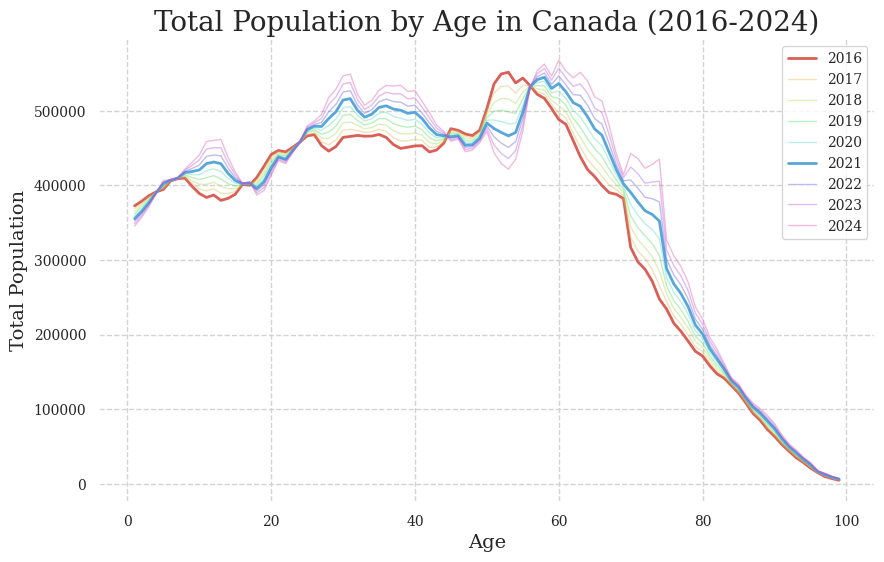

In [13]:
# plot the interpolated total population by age for years 2016 to 2024
# use palette hls from seaborn
palette = sns.color_palette("hls", 9)

plt.figure(figsize=(10, 6))
for year in range(2016, 2025):  
    if year == 2016 or year == 2021:
        alpha = 1.0
    else:
        alpha = 0.4
    data_year = canada_interp_total.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Total").to_series().to_list()
    plt.plot(ages, totals, label=str(year), alpha=alpha, color=palette[year - 2016], linewidth=2 if year in [2016, 2021] else 1)
plt.xlabel("Age")
plt.ylabel("Total Population")
plt.title("Total Population by Age in Canada (2016-2024)")
plt.legend()
plt.savefig('visualizations/canada/01_06.pdf', bbox_inches='tight')
plt.show()

2021
2022
2023
2024


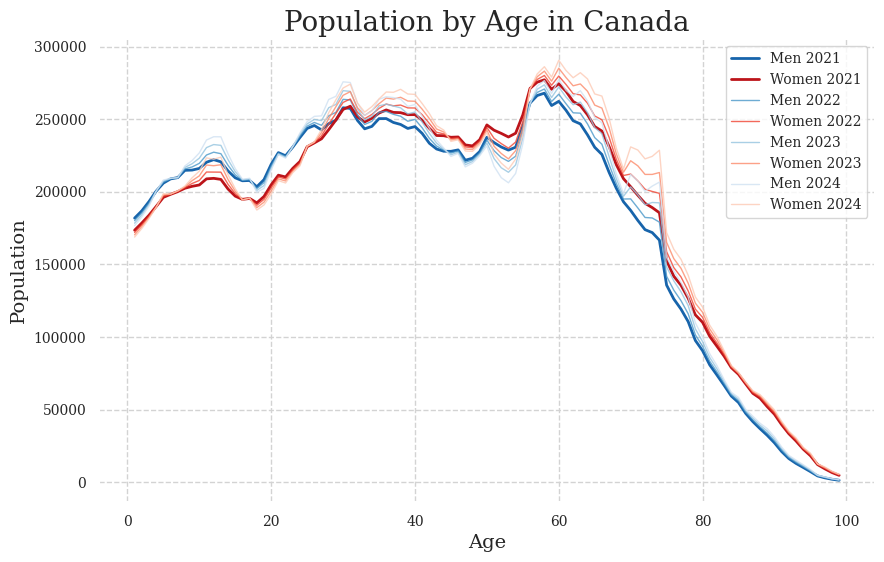

In [14]:
# plot the interpolated total population by age for years 2016 to 2024
# use blue palette for men and red palette for women
men_palette = sns.color_palette("Blues_r", 4)
women_palette = sns.color_palette("Reds_r", 4)

plt.figure(figsize=(10, 6))
for year in range(2021, 2025):  
    print(year)
    if year == 2021:
        alpha = 1
        linewidth = 2
    else:
        alpha = 0.8
        linewidth = 1
    data_year = canada_interp_men.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Men").to_series().to_list()
    plt.plot(ages, totals, label=f"Men {year}", alpha=alpha, color=men_palette[year - 2021], linewidth=linewidth)
    data_year_women = canada_interp_women.filter(pl.col("Census Year") == year)
    ages_women = data_year_women.select("Age").to_series().to_list()
    totals_women = data_year_women.select("Women").to_series().to_list()
    plt.plot(ages_women, totals_women, label=f"Women {year}", alpha=alpha, color=women_palette[year - 2021], linewidth=linewidth)
plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population by Age in Canada")
plt.legend()
plt.savefig('visualizations/canada/01_08.pdf', bbox_inches='tight')
plt.show()

# Prescriptions 

In [15]:
import pandas as pd
cefs = pd.read_csv("data/processed/cephalosporins_canada.csv")
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75
1,1st gen cephalosporins,2022,1499.57,209.04
2,1st gen cephalosporins,2023,1538.61,219.01
3,1st gen cephalosporins,2024,1556.29,224.33
4,2/3rd gen cephalosporins,2021,493.13,58.05
5,2/3rd gen cephalosporins,2022,584.43,71.05
6,2/3rd gen cephalosporins,2023,691.32,82.87
7,2/3rd gen cephalosporins,2024,683.02,81.60
8,4/5th gen cephalosporins,2021,0.21,0.04
9,4/5th gen cephalosporins,2022,0.26,0.04


In [16]:
total_population_per_year = {}
for year in range(2021, 2025):
    total_population = canada_interp_total.filter(pl.col("Census Year") == year).select(pl.col("Total").sum()).to_series()[0]
    total_population_per_year[year] = total_population

total_population_per_year = pl.DataFrame({
    "Year": list(range(2021, 2025)),
    "Total_Population": [total_population_per_year[year] for year in range(2021, 2025)]
})
total_population_per_year


Year,Total_Population
i64,f64
2021,3.6639335e7
2022,3.7061e7
2023,3.7500e7
2024,3.7957e7


In [18]:
# 1) Polars -> pandas
pop_df = (
    total_population_per_year
      .to_pandas()                       # columnas: ['Year','Total_Population']
      .astype({'Year': 'int64'})
)

# 2) Asegura que cefs.Year también sea int
cefs = cefs.astype({'Year': 'int64'})

# 3) Merge correcto (left)
cefs_tp = pd.merge(cefs, pop_df, on='Year', how='left')


In [20]:
# get the total prescriptions = cefs['Canada_Prescriptions']*1000 *population that year
cefs_tp['Total_Prescriptions']= cefs_tp['Canada_Prescriptions']*1000 * cefs_tp['Total_Population']
cefs_tp

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions,Total_Population,Total_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75,3.663934e+07,7.721740e+12
1,1st gen cephalosporins,2022,1499.57,209.04,3.706111e+07,7.747255e+12
2,1st gen cephalosporins,2023,1538.61,219.01,3.750027e+07,8.212935e+12
3,1st gen cephalosporins,2024,1556.29,224.33,3.795738e+07,8.514979e+12
4,2/3rd gen cephalosporins,2021,493.13,58.05,3.663934e+07,2.126913e+12
5,2/3rd gen cephalosporins,2022,584.43,71.05,3.706111e+07,2.633192e+12
6,2/3rd gen cephalosporins,2023,691.32,82.87,3.750027e+07,3.107648e+12
7,2/3rd gen cephalosporins,2024,683.02,81.60,3.795738e+07,3.097322e+12
8,4/5th gen cephalosporins,2021,0.21,0.04,3.663934e+07,1.465573e+09
9,4/5th gen cephalosporins,2022,0.26,0.04,3.706111e+07,1.482444e+09


In [ ]:
# transpose cefs
cefs_transposed = cefs.set_index('Year').T.reset_index()
cefs_transposed

Year,index,2021,2022,2023,2024,2021,2022,2023,2024,2021,2022,2023,2024
0,Antimicrobial_Class,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins
1,Canada_DDD,1529.37,1499.57,1538.61,1556.29,493.13,584.43,691.32,683.02,0.21,0.26,0.49,0.51
2,Canada_Prescriptions,210.75,209.04,219.01,224.33,58.05,71.05,82.87,81.6,0.04,0.04,0.07,0.08
